In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test=pd.read_excel('Test_set.xlsx')
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.shape

(10683, 11)

In [6]:
df.isnull().values.any()

True

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
print('Number of rows x columns in dataset are:',test.shape)
print('Dataset contains any null values:',test.isnull().values.any())
test.info()

Number of rows x columns in dataset are: (2671, 10)
Dataset contains any null values: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
df[df.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
df[df['Source']=='Delhi'][df['Destination']=='Cochin'][df['Duration']=='23h 40m'][df['Airline']=='Air India'][df['Price']==7480]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
df.loc[9039,'Route']='DEL → MAA → COK'
df.loc[9039,'Total_Stops']='1 stop'
df.loc[[9039]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 07 May,23h 40m,1 stop,No info,7480


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
for i in df.columns:
    if 0<len(df[df[i]==' ']):
        print(i)
        print(len(df[df[i]==' ']))

In [14]:
for i in df.columns:
    if 0<len(df[df[i]=='']):
        print(i)
        print(len(df[df[i]=='']))

In [15]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

In [16]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [17]:
date=[]
month=[]
year=[]
for i in range(len(df.Date_of_Journey)):
    date.append(int(df.Date_of_Journey[i].split('/')[0]))
    month.append(int(df.Date_of_Journey[i].split('/')[1]))
    year.append(int(df.Date_of_Journey[i].split('/')[2]))

In [18]:
df['date']=date
df['month']=month
df['year']=year
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [19]:
df.year.value_counts()

2019    10683
Name: year, dtype: int64

In [20]:
df=df.drop(['Date_of_Journey','year','date','Route','Dep_Time','Arrival_Time'],axis=1)

In [21]:
date=[]
month=[]
year=[]
for i in range(len(test.Date_of_Journey)):
    date.append(int(test.Date_of_Journey[i].split('/')[0]))
    month.append(int(test.Date_of_Journey[i].split('/')[1]))
    year.append(int(test.Date_of_Journey[i].split('/')[2]))
test['date']=date
test['month']=month
test['year']=year
test=test.drop(['Date_of_Journey','year','date','Route','Dep_Time','Arrival_Time'],axis=1)

In [22]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,6
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,4
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,4
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,3


In [23]:
total=[]
for i in range(len(df.Duration)):
    if len(df.Duration[i].split())>1:
        hour=int(df.Duration[i].split()[0][:-1])*60
        minute=int(df.Duration[i].split()[1][:-1])
        total.append(hour+minute)
    else:
        if df.Duration[i].split()[0][-1]=='h':
            total.append(int(df.Duration[i].split()[0][:-1])*60)
        else:
            total.append(int(df.Duration[i].split()[0][:-1]))
df['Time']=total
total=[]
for i in range(len(test.Duration)):
    if len(test.Duration[i].split())>1:
        hour=int(test.Duration[i].split()[0][:-1])*60
        minute=int(test.Duration[i].split()[1][:-1])
        total.append(hour+minute)
    else:
        if test.Duration[i].split()[0][-1]=='h':
            total.append(int(test.Duration[i].split()[0][:-1])*60)
        else:
            total.append(int(test.Duration[i].split()[0][:-1]))
test['Time']=total
df=df.drop(['Duration'],axis=1)
test=test.drop(['Duration'],axis=1)

In [24]:
df.Total_Stops.value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
for i in range(len(df.Total_Stops)):
    if df.Total_Stops[i]=='1 stop':
        df.Total_Stops[i]=1
    elif df.Total_Stops[i]=='non-stop':
        df.Total_Stops[i]=0
    elif df.Total_Stops[i]=='2 stops':
        df.Total_Stops[i]=2
    elif df.Total_Stops[i]=='3 stops':
        df.Total_Stops[i]=3
    elif df.Total_Stops[i]=='4 stops':
        df.Total_Stops[i]=4
for i in range(len(test.Total_Stops)):
    if test.Total_Stops[i]=='1 stop':
        test.Total_Stops[i]=1
    elif test.Total_Stops[i]=='non-stop':
        test.Total_Stops[i]=0
    elif test.Total_Stops[i]=='2 stops':
        test.Total_Stops[i]=2
    elif test.Total_Stops[i]=='3 stops':
        test.Total_Stops[i]=3
    elif test.Total_Stops[i]=='4 stops':
        test.Total_Stops[i]=4

In [26]:
listy=list(set(df.Source.values))
misty=list(set(df.Destination.values))
listy.extend(misty)
unique=list(set(listy))
dicty={}
for i in range(len(unique)):
    dicty[unique[i]]=i
print(dicty)
print(df.Source.value_counts())
print(df.Destination.value_counts())
print(test.Source.value_counts())
print(test.Destination.value_counts())

{'Chennai': 0, 'Hyderabad': 1, 'Kolkata': 2, 'Banglore': 3, 'Delhi': 4, 'Mumbai': 5, 'Cochin': 6, 'New Delhi': 7}
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [27]:
for i in range(len(df.Source)):
    df['Source'][i]=dicty[df['Source'][i]]
for i in range(len(test.Source)):
    test['Source'][i]=dicty[test['Source'][i]]
for i in range(len(df.Destination)):
    df['Destination'][i]=dicty[df['Destination'][i]]
for i in range(len(test.Source)):
    test['Destination'][i]=dicty[test['Destination'][i]]
print(df.Source.value_counts())
print(df.Destination.value_counts())
print(test.Source.value_counts())
print(test.Destination.value_counts())

4    4537
2    2871
3    2197
5     697
0     381
Name: Source, dtype: int64
6    4537
3    2871
4    1265
7     932
1     697
2     381
Name: Destination, dtype: int64
4    1145
2     710
3     555
5     186
0      75
Name: Source, dtype: int64
6    1145
3     710
4     317
7     238
1     186
2      75
Name: Destination, dtype: int64


In [28]:
dicty={}
for j in ['Airline','Additional_Info']:
    for i in df[[j]]:
        dicto={}
        for j in range(len(df[i].unique())):
            dicto[df[i].unique()[j]]=j
        dicty[i]=dicto
dicty

{'Airline': {'IndiGo': 0,
  'Air India': 1,
  'Jet Airways': 2,
  'SpiceJet': 3,
  'Multiple carriers': 4,
  'GoAir': 5,
  'Vistara': 6,
  'Air Asia': 7,
  'Vistara Premium economy': 8,
  'Jet Airways Business': 9,
  'Multiple carriers Premium economy': 10,
  'Trujet': 11},
 'Additional_Info': {'No info': 0,
  'In-flight meal not included': 1,
  'No check-in baggage included': 2,
  '1 Short layover': 3,
  'No Info': 4,
  '1 Long layover': 5,
  'Change airports': 6,
  'Business class': 7,
  'Red-eye flight': 8,
  '2 Long layover': 9}}

In [29]:
dicty['Additional_Info']['No Info']=dicty['Additional_Info']['No info']

In [30]:
for j in ['Airline','Additional_Info']:
    for i in [j]:
        df[i]=df[i].apply(lambda x:dicty[i][x])
for j in ['Airline','Additional_Info']:
    for i in [j]:
        test[i]=test[i].apply(lambda x:dicty[i][x])

In [31]:
test

,Airline,Source,Destination,Total_Stops,Additional_Info,month,Time
0,2,4,6,1,0,6,655
1,0,2,3,1,0,5,240
2,2,4,6,1,1,5,1425
3,4,4,6,1,0,5,780
4,7,3,4,0,0,6,170
...,...,...,...,...,...,...,...
2666,1,2,3,1,0,6,1435
2667,0,2,3,0,0,3,155
2668,2,4,6,1,0,3,395
2669,1,4,6,1,0,3,915


In [32]:
df = df.astype({'Destination': np.int64})
df = df.astype({'Source': np.int64})
df = df.astype({'Total_Stops': np.int64})
test = test.astype({'Destination': np.int64})
test = test.astype({'Source': np.int64})
test = test.astype({'Total_Stops': np.int64})

In [33]:
df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,Time
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,2.151456,3.179444,4.575307,0.824207,0.262754,9087.064121,4.708602,643.093232
std,1.784625,1.115037,1.775348,0.675199,0.580647,4611.359167,1.164357,507.862001
min,0.000000,0.000000,1.000000,0.000000,0.000000,1759.000000,3.000000,5.000000
25%,1.000000,2.000000,3.000000,0.000000,0.000000,5277.000000,3.000000,170.000000
50%,2.000000,3.000000,6.000000,1.000000,0.000000,8372.000000,5.000000,520.000000
75%,3.000000,4.000000,6.000000,1.000000,0.000000,12373.000000,6.000000,930.000000
max,11.000000,5.000000,7.000000,4.000000,9.000000,79512.000000,6.000000,2860.000000


In [34]:
df.corr()['Price']

Airline            0.067032
Source             0.103453
Destination        0.372600
Total_Stops        0.603883
Additional_Info    0.014019
Price              1.000000
month             -0.103651
Time               0.506371
Name: Price, dtype: float64

<AxesSubplot:>

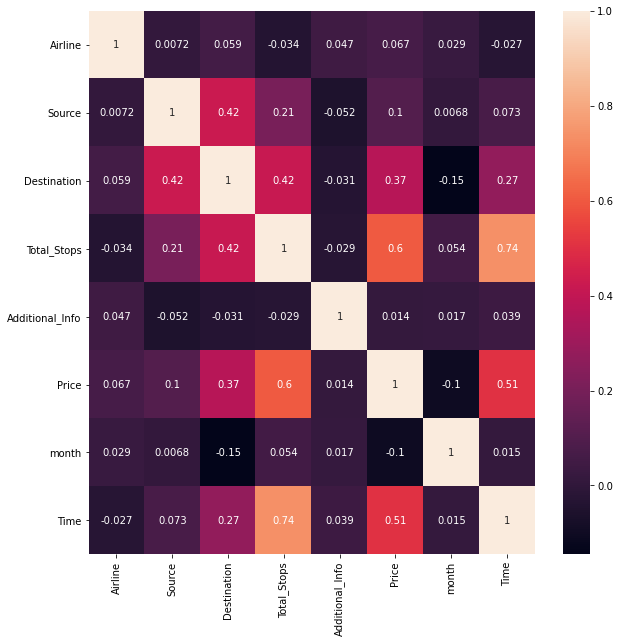

In [35]:
plt.figure(figsize=[10,10])
sn.heatmap(df.corr(),annot=True)

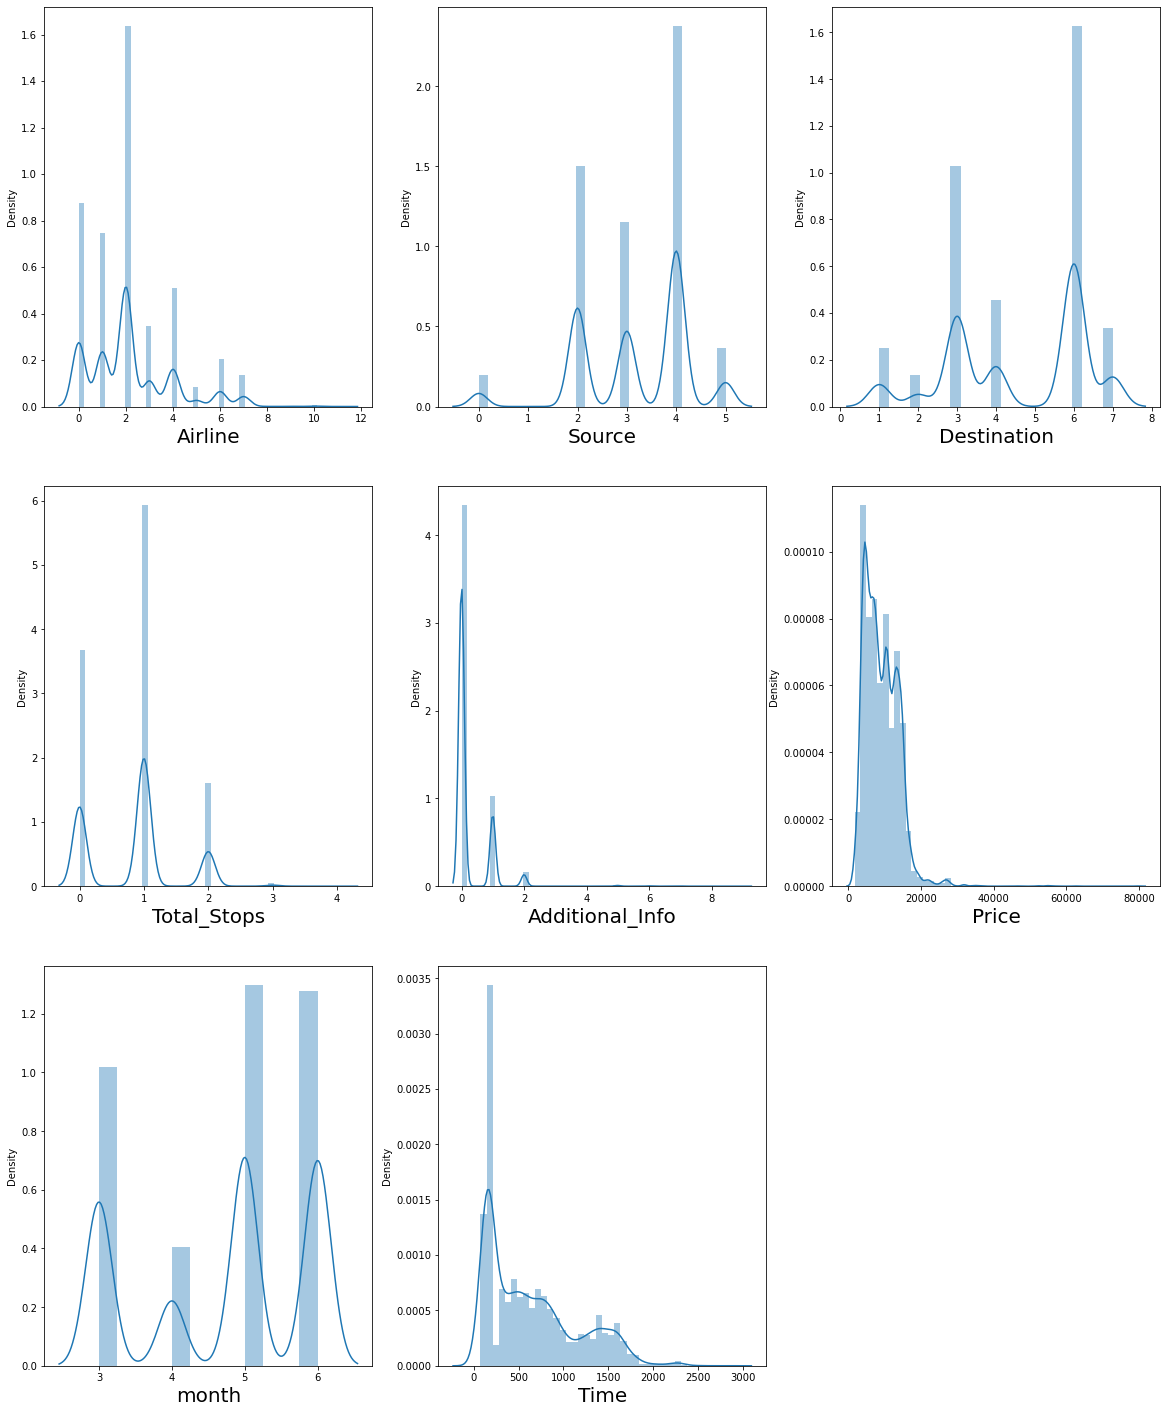

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

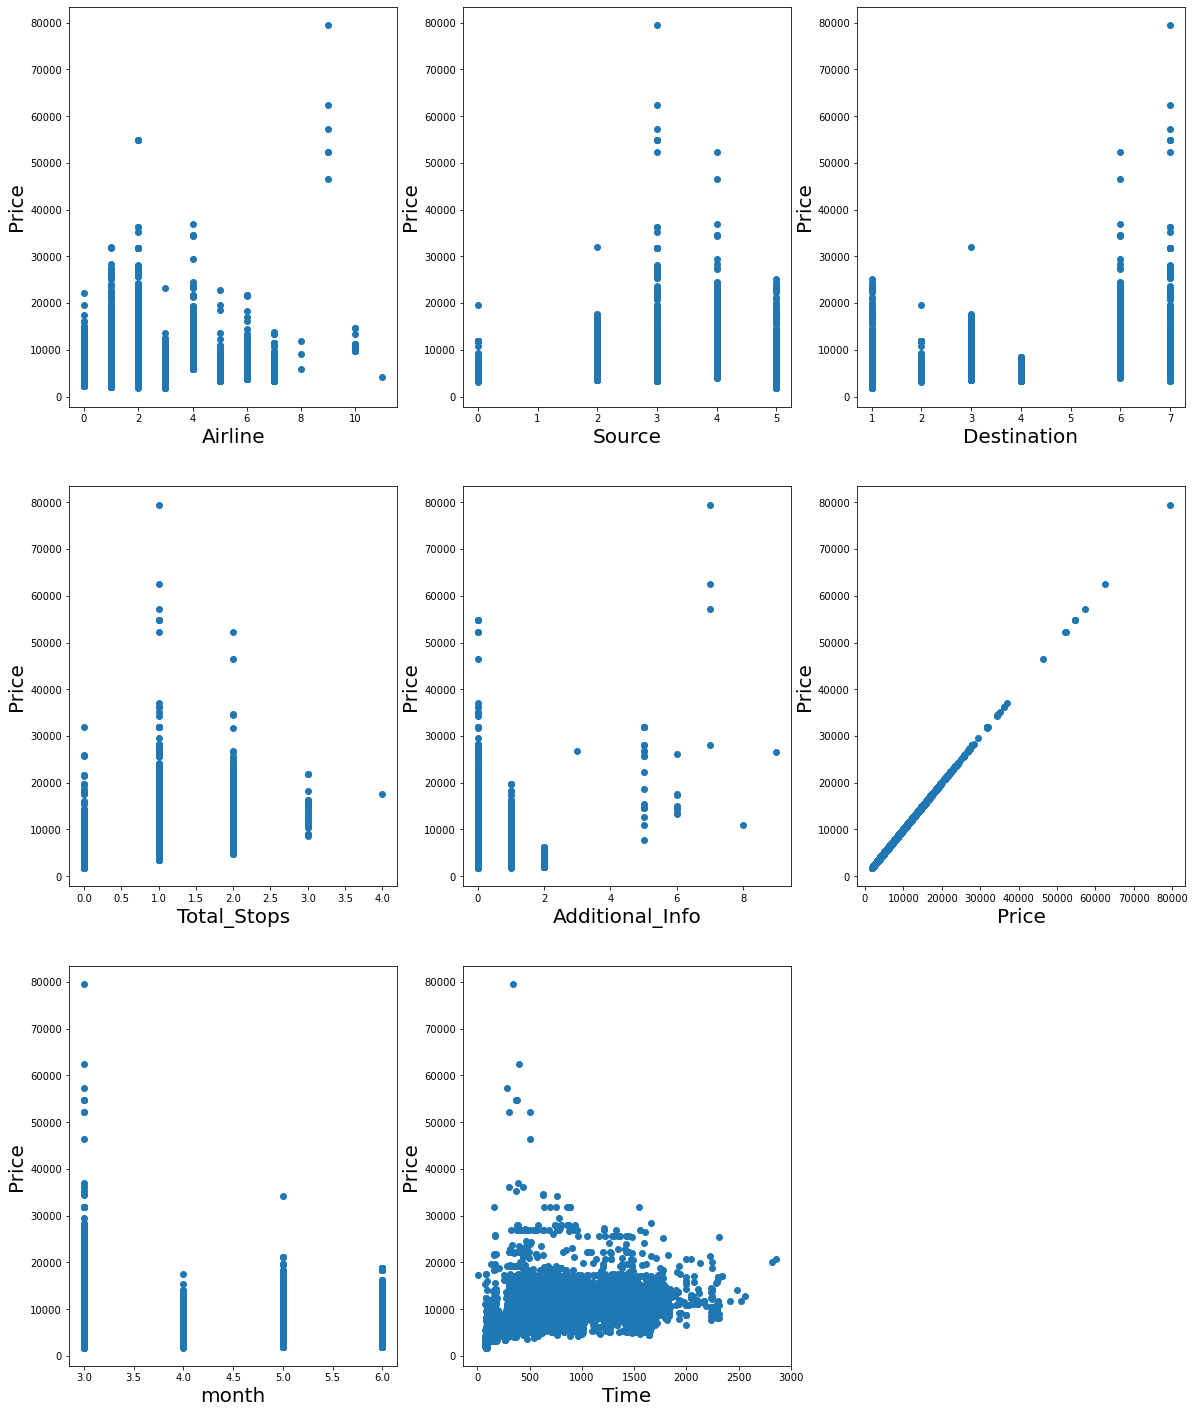

In [37]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df[i],df['Price'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.show()

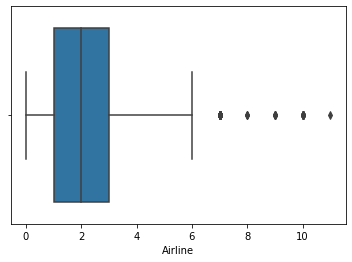

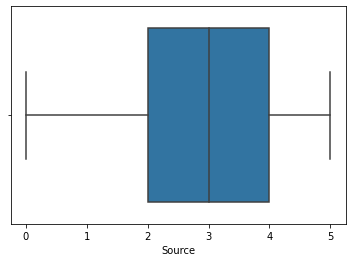

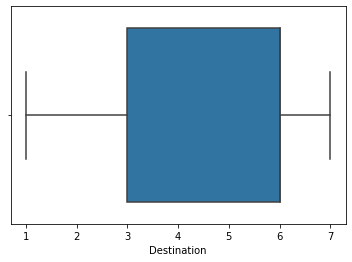

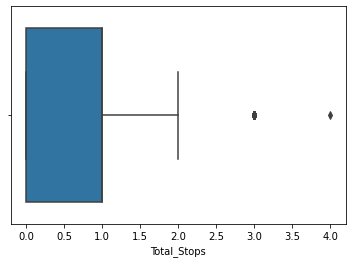

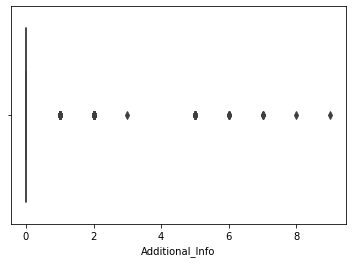

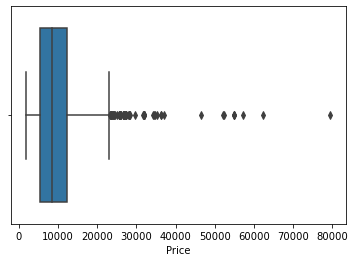

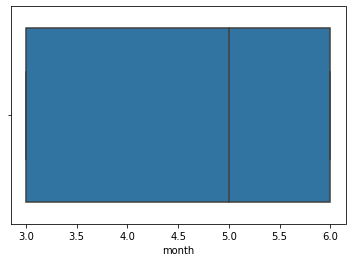

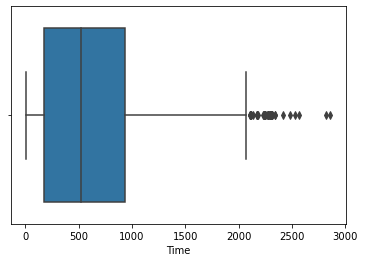

In [38]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

In [39]:
from scipy.stats import zscore
z_scr=zscore(df)
print(df.shape)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(10683, 8)
(10457, 8)


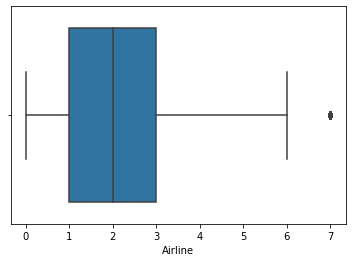

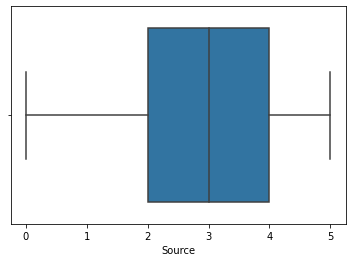

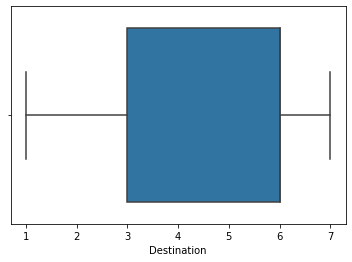

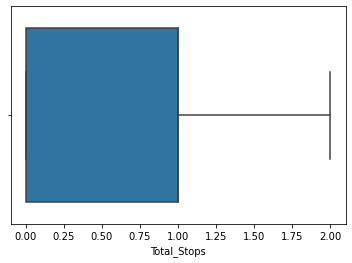

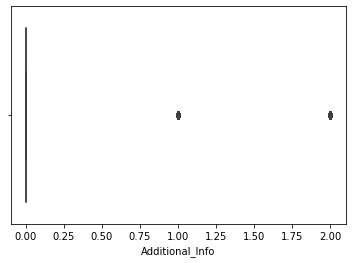

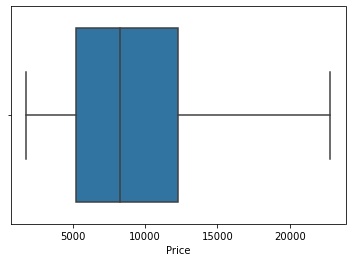

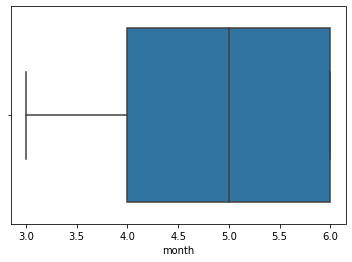

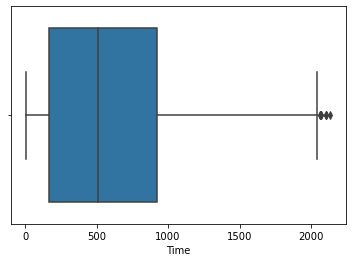

In [40]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

In [41]:
z_scr=zscore(df_new)
print(df_new.shape)
df=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df.shape)

(10457, 8)
(10099, 8)


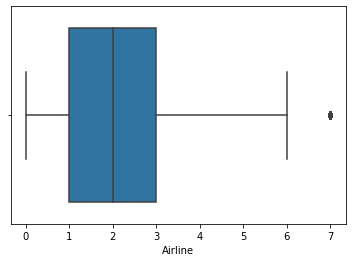

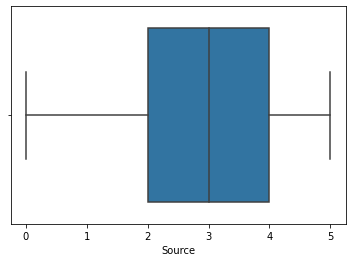

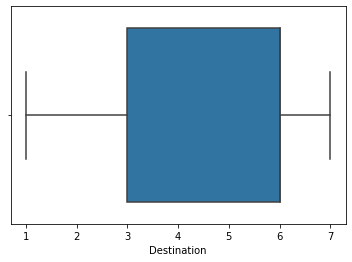

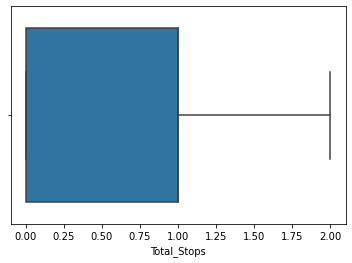

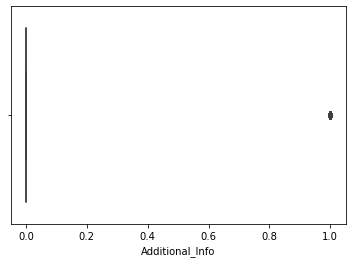

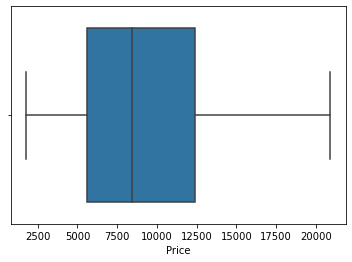

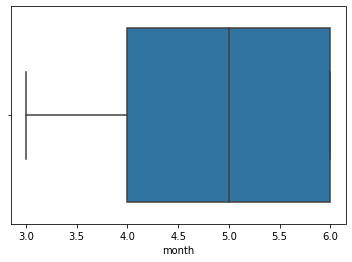

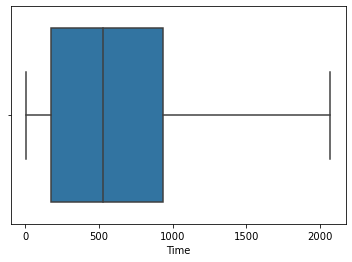

In [42]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

In [43]:
y = df[['Price']]
x = df.drop(columns = ['Price'],axis=1)

In [44]:
x.skew()

Airline            0.973893
Source            -0.682312
Destination       -0.409237
Total_Stops        0.191942
Additional_Info    1.535326
month             -0.431797
Time               0.738539
dtype: float64

In [45]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [46]:
for index in test.skew().index:
    if test.skew().loc[index] >0.55:
        test[index]=np.cbrt(test[index])

In [47]:
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

Airline           -0.893934
Source            -0.682312
Destination       -0.409237
Total_Stops        0.191942
Additional_Info    1.535326
month             -0.431797
Time               0.109080
dtype: float64

1


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Time']] = scaler.fit_transform(x[['Time']])
test[['Time']]=scaler.transform(test[['Time']])

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,4.425297,Airline
1,11.833682,Source
2,10.139022,Destination
3,7.863587,Total_Stops
4,1.340193,Additional_Info
5,9.271981,month
6,2.877205,Time


In [50]:
x=x.drop(['month'],axis=1)
test=test.drop(['month'],axis=1)

In [51]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.910392,Airline
1,10.661398,Source
2,9.957001,Destination
3,7.121760,Total_Stops
4,1.321246,Additional_Info
5,2.541780,Time


In [52]:
from sklearn.decomposition import PCA
for i in range(2,x.shape[1]+1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.7792487811020595
3 0.9083098847675118
4 0.9592342749240128
5 0.9835299268828139
6 1.0


In [53]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
testy=pca.transform(test)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [55]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor



models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=4,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.7015723133473453
r2 0.6867005451127313
diff 0.014871768234614002
mae 1581.6545021446136
rmse 2209.7706919962966
**********
NuSVR()
score 0.11381631800686276
r2 0.1437708512877124
diff 0.029954533280849627
mae 3096.383041645793
rmse 3653.1070079317324
**********
LinearRegression()
score 0.480468973441484
r2 0.4804123948670812
diff 5.6578574402776916e-05
mae 2204.000546169672
rmse 2845.7502377910555
**********
Ridge()
score 0.48046919751716677
r2 0.4804130083388196
diff 5.6189178347154645e-05
mae 2204.0153612458707
rmse 2845.7485578165492
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.48047045284421924
r2 0.4804180769227695
diff 5.2375921449743235e-05
mae 2204.148603451949
rmse 2845.7346776089294
**********
BayesianRidge()
score 0.4804700143606197
r2 0.480416109804375
diff 5.3904556244710466e-05
mae 2204.0943176261862
rmse 2845.740064528184
**********
SGDRegressor()
score 0.4802741118829328
r2 0.47850784841041294
diff 0.0017662

In [57]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
parameters={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
clf = RandomizedSearchCV(LGBMRegressor(), parameters, cv=4,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'colsample_bytree': 0.746697643100316,
 'min_child_samples': 170,
 'min_child_weight': 10.0,
 'num_leaves': 36,
 'reg_alpha': 50,
 'reg_lambda': 10,
 'subsample': 0.4632150115699138}

In [58]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = GridSearchCV(XGBRegressor(), parameters, cv=4,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 4 folds for each of 36 candidates, totalling 144 fits


{'max_depth': 7, 'n_estimators': 45, 'reg_lambda': 0.26}

In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=4,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [ ]:
besttrain(LGBMRegressor(colsample_bytree=0.6976834926911494,
 min_child_samples=128,
 min_child_weight= 0.001,
 num_leaves= 41,
 reg_alpha= 2,
 reg_lambda= 10,
 subsample= 0.3113973200874835),principalComponents,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=86, test_size=0.2)
stack = StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.8145855414008392,min_child_samples=273,
                                                      min_child_weight= 1e-05,num_leaves= 39,reg_alpha= 7,reg_lambda= 20,
                                                      subsample= 0.34372869544141943), 
                                        RandomForestRegressor(criterion='mse',max_features='sqrt',n_estimators=500),
                                        XGBRegressor(max_depth=7,n_estimators=45,reg_lambda=0.25)
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.8145855414008392,min_child_samples=273,
                                                      min_child_weight= 1e-05,num_leaves= 39,reg_alpha= 7,reg_lambda= 20,
                                                   subsample= 0.34372869544141943), 
                            cv=4,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

In [ ]:
y_pred=stack.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.8145855414008392,min_child_samples=273,
                                                      min_child_weight= 1e-05,num_leaves= 39,reg_alpha= 7,reg_lambda= 20,
                                                      subsample= 0.34372869544141943), 
                                        RandomForestRegressor(criterion='mse',max_features='sqrt',n_estimators=500),
                                        XGBRegressor(max_depth=7,n_estimators=45,reg_lambda=0.25)
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.8145855414008392,min_child_samples=273,
                                                      min_child_weight= 1e-05,num_leaves= 39,reg_alpha= 7,reg_lambda= 20,
                                                   subsample= 0.34372869544141943), 
                            cv=4,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),principalComponents,y,cv=4,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

In [ ]:
y_pred=stack.predict(testy)
test=pd.read_excel('Test_set.xlsx')
test['Pred']=[round(i) for i in y_pred]
test

In [ ]:
test.to_excel('Flight.xlsx')

In [ ]:
y_pred=stack.predict(principalComponents)
df['Pred']=[round(i) for i in y_pred]
df

In [ ]:
dataframe=pd.DataFrame()
dataframe['Price']=[round(i) for i in y_pred]
dataframe

In [ ]:
dataframe.to_excel('Price.xlsx')

In [ ]:
sn.lmplot(x='Price',y='Pred',data=df,palette='rainbow')

In [ ]:
plt.plot(X_test,y_test,'r*')
plt.plot(X_test,stack.predict(X_test),'b.')
plt.show()

In [ ]:
sn.distplot(df['Price'])
sn.distplot(df['Pred'])

In [ ]:
import joblib
joblib.dump(stack,'Flight.pkl')